# Import Library

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import h5py

# Pre-Trained Word2Vector

In [14]:
vocab_size = 65908
embedding_dim = 100
max_sequence_length = 100

In [15]:
df_data = pd.read_csv('data/data_hasil_prepos.csv')

df_data.head()

statement   status  \
0                                         oh my gosh  Anxiety   
1  trouble sleeping, confused mind, restless hear...  Anxiety   
2  All wrong, back off dear, forward doubt. Stay ...  Anxiety   
3  I've shifted my focus to something else but I'...  Anxiety   
4  I'm restless and restless, it's been a month n...  Anxiety   

                                translated_statement  \
0                                           Ya ampun   
1  susah tidur, pikiran kacau, hati gelisah. Semu...   
2  Semua salah, mundurlah sayang, maju terus ragu...   
3  Aku mengalihkan fokusku ke hal lain tapi aku m...   
4  Aku gelisah dan gelisah, sudah sebulan sekaran...   

                                   preprocessed_text  \
0                                              ampun   
1  susah tidur pikir kacau hati gelisah semua tak...   
2  semua salah mundur lah sayang maju ragu tetapl...   
3                              alih fokusku khawatir   
4                 gelisah gelisah sebul nak maksudmu   

                                      tokenized_text  
0                                          ['ampun']  
1  ['susah', 'tidur', 'pikir', 'kacau', 'hati', '...  
2  ['semua', 'salah', 'mundur', 'lah', 'sayang', ...  
3                    ['alih', 'fokusku', 'khawatir']  
4  ['gelisah', 'gelisah', 'sebul', 'nak', 'maksud...

In [16]:
from nltk.tokenize import word_tokenize

df_data['tokenized_text'] = df_data['preprocessed_text'].astype(str).apply(word_tokenize)

In [17]:
df_data.head()

statement   status  \
0                                         oh my gosh  Anxiety   
1  trouble sleeping, confused mind, restless hear...  Anxiety   
2  All wrong, back off dear, forward doubt. Stay ...  Anxiety   
3  I've shifted my focus to something else but I'...  Anxiety   
4  I'm restless and restless, it's been a month n...  Anxiety   

                                translated_statement  \
0                                           Ya ampun   
1  susah tidur, pikiran kacau, hati gelisah. Semu...   
2  Semua salah, mundurlah sayang, maju terus ragu...   
3  Aku mengalihkan fokusku ke hal lain tapi aku m...   
4  Aku gelisah dan gelisah, sudah sebulan sekaran...   

                                   preprocessed_text  \
0                                              ampun   
1  susah tidur pikir kacau hati gelisah semua tak...   
2  semua salah mundur lah sayang maju ragu tetapl...   
3                              alih fokusku khawatir   
4                 gelisah gelisah sebul nak maksudmu   

                                      tokenized_text  
0                                            [ampun]  
1  [susah, tidur, pikir, kacau, hati, gelisah, se...  
2  [semua, salah, mundur, lah, sayang, maju, ragu...  
3                          [alih, fokusku, khawatir]  
4           [gelisah, gelisah, sebul, nak, maksudmu]

In [18]:
sentences = df_data['tokenized_text'].tolist()
print(sentences)

[['ampun'], ['susah', 'tidur', 'pikir', 'kacau', 'hati', 'gelisah', 'semua', 'tak', 'selaras'], ['semua', 'salah', 'mundur', 'lah', 'sayang', 'maju', 'ragu', 'tetaplah', 'tempat', 'gelisah', 'tak', 'tenang'], ['alih', 'fokusku', 'khawatir'], ['gelisah', 'gelisah', 'sebul', 'nak', 'maksudmu'], ['istirahat', 'degdegan', 'janggal', 'gimana'], ['rasa', 'takut', 'cemas', 'laku', 'semoga', 'keluarga', 'semua', 'lindung'], ['pernah', 'kah', 'rasa', 'gugup', 'tahu'], ['hari', 'tidur', 'nyenyak', 'gelisah'], ['benarbenar', 'khawatir', 'tangis'], ['selalu', 'gelisah', 'tiap', 'malam', 'aneh'], ['bingung', 'akhirakhir', 'badan', 'enak', 'badan', 'tiap', 'tidur', 'badan', 'selalu', 'gelisah'], ['terkadang', 'butuh', 'masalah', 'tertawa', 'lupa', 'kalau', 'masalah', 'ingat', 'dia', 'gelisah', 'ternyata', 'punya', 'beban', 'sedih', 'bla', 'bla', 'bla'], ['kekhawatiran'], ['terkadang', 'pikir', 'kamu', 'sendiri', 'lah', 'buat', 'kamu', 'cemas', 'takut', 'pejam', 'mata', 'tidur'], ['bangun', 'tidur', 

In [19]:
# Latih model Word2Vec
from gensim.models import Word2Vec

word2vec_model = Word2Vec(sentences, 
                          vector_size=max_sequence_length, 
                          window=10, 
                          min_count=1, 
                          workers=4)

In [ ]:
# Simpan Word2Vec model
word2vec_model.save("model_word2vec/word2vec_model_MentalQ.model")

# Simpan embedding ke file .h5
save_h5 = "model_word2vec/word2vec_model_MentalQ.h5"

with h5py.File(save_h5, "w") as h5file:
    h5file.create_dataset("vocab", data=word2vec_model.wv.index_to_key, dtype=h5py.string_dtype(encoding='utf-8'))
    h5file.create_dataset("vectors", data=word2vec_model.wv.vectors)

In [21]:
# Buat word_index dari Word2Vec
word_index = {word: i + 1 for i, word in enumerate(word2vec_model.wv.index_to_key)}

# Buat embedding matrix
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    embedding_vector = word2vec_model.wv[word]
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [22]:
# Fungsi untuk mengonversi token menjadi indeks
def text_to_sequence(tokens, word_index):
    return [word_index[word] for word in tokens if word in word_index]

# Ubah kolom 'tokenized' menjadi sequence
df_data['sequence'] = df_data['tokenized_text'].apply(lambda x: text_to_sequence(x, word_index))
df_data.head()

statement   status  \
0                                         oh my gosh  Anxiety   
1  trouble sleeping, confused mind, restless hear...  Anxiety   
2  All wrong, back off dear, forward doubt. Stay ...  Anxiety   
3  I've shifted my focus to something else but I'...  Anxiety   
4  I'm restless and restless, it's been a month n...  Anxiety   

                                translated_statement  \
0                                           Ya ampun   
1  susah tidur, pikiran kacau, hati gelisah. Semu...   
2  Semua salah, mundurlah sayang, maju terus ragu...   
3  Aku mengalihkan fokusku ke hal lain tapi aku m...   
4  Aku gelisah dan gelisah, sudah sebulan sekaran...   

                                   preprocessed_text  \
0                                              ampun   
1  susah tidur pikir kacau hati gelisah semua tak...   
2  semua salah mundur lah sayang maju ragu tetapl...   
3                              alih fokusku khawatir   
4                 gelisah gelisah sebul nak maksudmu   

                                      tokenized_text  \
0                                            [ampun]   
1  [susah, tidur, pikir, kacau, hati, gelisah, se...   
2  [semua, salah, mundur, lah, sayang, maju, ragu...   
3                          [alih, fokusku, khawatir]   
4           [gelisah, gelisah, sebul, nak, maksudmu]   

                                            sequence  
0                                             [1047]  
1         [1203, 36, 11, 245, 98, 257, 9, 157, 4833]  
2  [9, 64, 1305, 74, 264, 371, 656, 1702, 58, 257...  
3                                  [441, 12204, 118]  
4                        [257, 257, 443, 7635, 8037]

In [23]:
# Padding sequence agar semua memiliki panjang yang sama
from tensorflow.keras.preprocessing.sequence import pad_sequences

padded_sequence = pad_sequences(df_data['sequence'], maxlen=max_sequence_length, padding='post')
print(padded_sequence)

[[1047    0    0 ...    0    0    0]
 [1203   36   11 ...    0    0    0]
 [   9   64 1305 ...    0    0    0]
 ...
 [  33  187  743 ...    0    0    0]
 [ 250  275   33 ...    0    0    0]
 [  47   10  146 ...    0    0    0]]


In [24]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
status_encoded = label_encoder.fit_transform(df_data['status'])
print(status_encoded)

[0 0 0 ... 0 0 0]


In [25]:
print("label:", label_encoder.classes_)

for encoded_value, class_label in zip(range(len(label_encoder.classes_)), label_encoder.classes_):
    print(f"Encoded value {encoded_value} -> label '{class_label}'")

label: ['Anxiety' 'Bipolar' 'Depression' 'Normal' 'Personality disorder' 'Stress'
 'Suicidal']
Encoded value 0 -> label 'Anxiety'
Encoded value 1 -> label 'Bipolar'
Encoded value 2 -> label 'Depression'
Encoded value 3 -> label 'Normal'
Encoded value 4 -> label 'Personality disorder'
Encoded value 5 -> label 'Stress'
Encoded value 6 -> label 'Suicidal'


In [41]:
# Menyimpan kelas dari LabelEncoder
np.save('data/label_encoding.npy', label_encoder.classes_)

# Data Preparation

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(padded_sequence,
                                                    status_encoded,
                                                    test_size=0.2,
                                                    random_state=60,
                                                    stratify=status_encoded
                                                    )

In [27]:
print(f'X train: {X_train.shape}\n{X_train}\n')
print(f'X test: {X_test.shape}\n{X_test}\n')
print(f'y train: {y_train.shape}\n{y_train}\n')
print(f'y test: {y_test.shape}\n{y_test}')

X train: (28230, 100)
[[1761  126  969 ...    0    0    0]
 [  52  217 5926 ...    0    0    0]
 [ 267   22  511 ...    0    0    0]
 ...
 [ 294    0    0 ...    0    0    0]
 [ 115  231   25 ...    0    0    0]
 [ 221  221  318 ...    0    0    0]]

X test: (7058, 100)
[[  394 22294   358 ...     0     0     0]
 [   10    18   315 ...     0     0     0]
 [ 1934   316    29 ...     0     0     0]
 ...
 [14675   941     0 ...     0     0     0]
 [ 1709  3030   980 ...     0     0     0]
 [  227   961    39 ...     0     0     0]]

y train: (28230,)
[3 3 6 ... 3 2 3]

y test: (7058,)
[5 6 2 ... 3 2 5]


In [28]:
# Data distribusi di dataset awal
print("Distribusi dataset awal:")
print(pd.Series(status_encoded).value_counts(normalize=True))

# Data distribusi di training set
print("\nDistribusi di training set:")
print(pd.Series(y_train).value_counts(normalize=True))

# Data distribusi di testing set
print("\nDistribusi di testing set:")
print(pd.Series(y_test).value_counts(normalize=True))

Distribusi dataset awal:
3    0.449756
2    0.224439
6    0.182215
0    0.055940
5    0.046021
1    0.030237
4    0.011392
Name: proportion, dtype: float64

Distribusi di training set:
3    0.449770
2    0.224442
6    0.182217
0    0.055933
5    0.046015
1    0.030216
4    0.011406
Name: proportion, dtype: float64

Distribusi di testing set:
3    0.449702
2    0.224426
6    0.182205
0    0.055965
5    0.046047
1    0.030320
4    0.011335
Name: proportion, dtype: float64


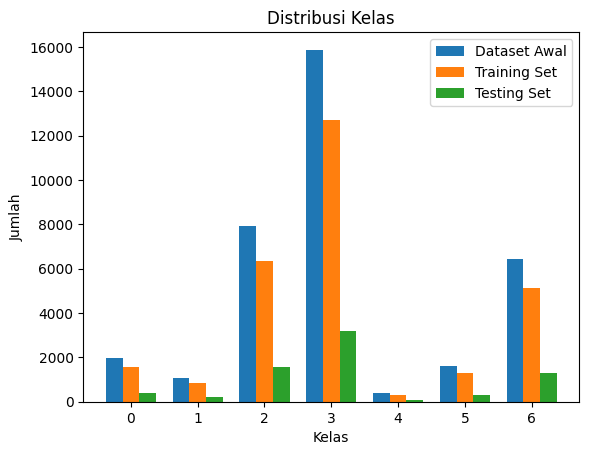

In [29]:
# Hitung distribusi kelas
classes, counts_full = np.unique(status_encoded, return_counts=True)
_, counts_train = np.unique(y_train, return_counts=True)
_, counts_test = np.unique(y_test, return_counts=True)

# Plot distribusi
bar_width = 0.25
x = np.arange(len(classes))

plt.bar(x - bar_width, counts_full, width=bar_width, label="Dataset Awal")
plt.bar(x, counts_train, width=bar_width, label="Training Set")
plt.bar(x + bar_width, counts_test, width=bar_width, label="Testing Set")

plt.xlabel("Kelas")
plt.ylabel("Jumlah")
plt.title("Distribusi Kelas")
plt.xticks(x, classes)
plt.legend()
plt.show()

# Modeling

In [30]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout, BatchNormalization
from keras.regularizers import l2
from keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau

In [ ]:
def create_model():
    model = Sequential([
        # Embedding Layer
        Embedding(input_dim=len(word_index) + 1, 
                  output_dim=embedding_dim, 
                  weights=[embedding_matrix], 
                  trainable=True),

        # Bidirectional LSTM Layer
        Bidirectional(LSTM(256,
                           kernel_regularizer=l2(0.0005),
                           return_sequences=False)),
        Dropout(0.1),
        BatchNormalization(),
        
        # Dense Layer 1
        Dense(48, activation='tanh'),
        Dropout(0.5),
        BatchNormalization(),
        
        # Dense Layer 2
        Dense(16, activation='tanh'),
        Dropout(0.1),
        BatchNormalization(),
        
        # Output Layer
        Dense(7, activation='softmax')
    ])

    # Compile model dengan learning rate yang ditemukan oleh tuner
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [34]:
# Callbacks
early_stopping_overfitting = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6
)

# Hitung class weights
class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))

In [35]:
model = create_model()

# Train & Evaluasi Model

In [36]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=32,
    callbacks=[reduce_lr],
    class_weight=class_weights
)

Epoch 1/30
883/883 ━━━━━━━━━━━━━━━━━━━━ 126s 137ms/step - accuracy: 0.3660 - loss: 2.1008 - val_accuracy: 0.5667 - val_loss: 1.3718 - learning_rate: 1.0000e-04
Epoch 2/30
883/883 ━━━━━━━━━━━━━━━━━━━━ 126s 143ms/step - accuracy: 0.4805 - loss: 1.6906 - val_accuracy: 0.5584 - val_loss: 1.3755 - learning_rate: 1.0000e-04
Epoch 3/30
883/883 ━━━━━━━━━━━━━━━━━━━━ 130s 148ms/step - accuracy: 0.5186 - loss: 1.6068 - val_accuracy: 0.5792 - val_loss: 1.2913 - learning_rate: 1.0000e-04
Epoch 4/30
883/883 ━━━━━━━━━━━━━━━━━━━━ 133s 151ms/step - accuracy: 0.5415 - loss: 1.5230 - val_accuracy: 0.5979 - val_loss: 1.2485 - learning_rate: 1.0000e-04
Epoch 5/30
883/883 ━━━━━━━━━━━━━━━━━━━━ 128s 144ms/step - accuracy: 0.5677 - loss: 1.4269 - val_accuracy: 0.6061 - val_loss: 1.2300 - learning_rate: 1.0000e-04
Epoch 6/30
883/883 ━━━━━━━━━━━━━━━━━━━━ 139s 157ms/step - accuracy: 0.5732 - loss: 1.4135 - val_accuracy: 0.6269 - val_loss: 1.2049 - learning_rate: 1.0000e-04
Epoch 7/30
883/883 ━━━━━━━━━━━━━━━━━━━━ 

In [38]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 100)       │     2,791,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 512)            │       731,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 48)             │        24,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 48)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 48)             │           192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           119 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,649,399 (40.62 MB)

 Trainable params: 3,549,415 (13.54 MB)

 Non-trainable params: 1,152 (4.50 KB)

 Optimizer params: 7,098,832 (27.08 MB)

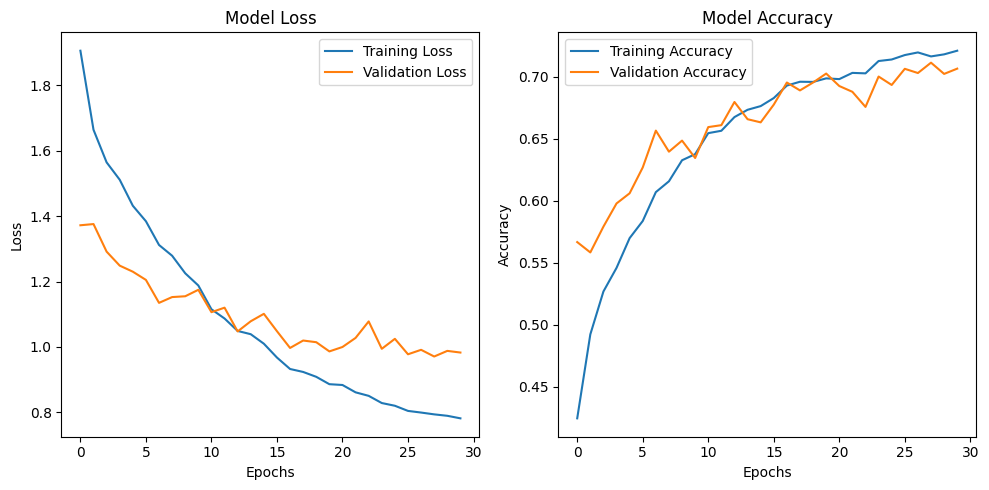

In [39]:
import matplotlib.pyplot as plt

ig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot Loss
axes[0].plot(history.history['loss'], label='Training Loss')
axes[0].plot(history.history['val_loss'], label='Validation Loss')
axes[0].set_title('Model Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()

# Plot Accuracy
axes[1].plot(history.history['accuracy'], label='Training Accuracy')
axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[1].set_title('Model Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

# Menampilkan subplot
plt.tight_layout()
plt.show()

In [40]:
model.save('model_save_ml/ml_model_lstm.h5')